In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import OLS
from statsmodels.api import add_constant

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
import os
os.getcwd()

'C:\\Users\\SarShel\\DEC\\CodeSprints\\Regression\\ASPRS\\FingerLakes'

In [3]:
os.chdir('C:\\Users\\SarShel\\DEC\\Regression')
os.getcwd()

'C:\\Users\\SarShel\\DEC\\Regression'

In [4]:
# Read Field dataset 
Data0 = pd.read_csv('data_raw/Indices/FingerLakes.csv')

# Remove none values
Data = Data0.dropna()

# Display the first few rows of our DataFrame
#FieldData.head()
print(Data)

     Unnamed: 0  Year  Month  Day      2BDA      3BDA      NDCI        B1  \
0           200  2017      7    3  0.912575 -0.084196 -0.049463  0.160814   
1           201  2017      7    3  0.919797 -0.077209 -0.041808  0.180428   
2           282  2017      8   19  0.865965 -0.134743 -0.071927  0.158669   
3           388  2018      7    3  0.876471 -0.133994 -0.066039  0.107397   
4           389  2018      7    5  0.806616  0.016263  0.006623  0.230924   
..          ...   ...    ...  ...       ...       ...       ...       ...   
112        1450  2020      9   20  0.940167 -0.059841 -0.034770  0.117000   
113        1451  2020      9   20  0.937430 -0.060636 -0.035975  0.117417   
114        1455  2020      9   20  0.860895 -0.138232 -0.074871  0.107421   
115        1456  2020      9   20  0.865806 -0.129911 -0.072058  0.110141   
116        1483  2020      9   27  0.985506 -0.017302 -0.007349  0.160810   

          B10       B11  ...        B6        B7        B8       B8A  \
0  

In [5]:
# Return the natural logarithm of Chl-a (Y)
Data['LnChl-a']=np.log(Data['Chl-a'])
print(Data)

     Unnamed: 0  Year  Month  Day      2BDA      3BDA      NDCI        B1  \
0           200  2017      7    3  0.912575 -0.084196 -0.049463  0.160814   
1           201  2017      7    3  0.919797 -0.077209 -0.041808  0.180428   
2           282  2017      8   19  0.865965 -0.134743 -0.071927  0.158669   
3           388  2018      7    3  0.876471 -0.133994 -0.066039  0.107397   
4           389  2018      7    5  0.806616  0.016263  0.006623  0.230924   
..          ...   ...    ...  ...       ...       ...       ...       ...   
112        1450  2020      9   20  0.940167 -0.059841 -0.034770  0.117000   
113        1451  2020      9   20  0.937430 -0.060636 -0.035975  0.117417   
114        1455  2020      9   20  0.860895 -0.138232 -0.074871  0.107421   
115        1456  2020      9   20  0.865806 -0.129911 -0.072058  0.110141   
116        1483  2020      9   27  0.985506 -0.017302 -0.007349  0.160810   

          B10       B11  ...        B7        B8       B8A        B9  \
0  

In [6]:
# Descriptive statistics of all variables
list = ['2BDA', 'NDCI', 'LnChl-a']

# get the summary
desc_data = Data [list].describe()

# add the standard deviation metric
desc_data.loc['+3_std'] = desc_data.loc['mean'] + (desc_data.loc['std'] * 3)
desc_data.loc['-3_std'] = desc_data.loc['mean'] - (desc_data.loc['std'] * 3)

# display it
desc_data

,2BDA,NDCI,LnChl-a
count,117.000000,117.000000,117.000000
mean,0.926077,-0.039133,1.318743
std,0.069430,0.036356,0.880799
min,0.796202,-0.113502,-1.473160
25%,0.874731,-0.066979,0.828552
50%,0.910392,-0.046959,1.376749
75%,0.964004,-0.018529,1.954445
max,1.082229,0.037450,3.209229
+3_std,1.134367,0.069934,3.961140
-3_std,0.717788,-0.148200,-1.323654


In [7]:
# Pearson Coefficient 
corr = Data[list].corr(method='pearson')

# display the correlation matrix
display(corr)

,2BDA,NDCI,LnChl-a
2BDA,1.000000,0.960599,0.051453
NDCI,0.960599,1.000000,0.070628
LnChl-a,0.051453,0.070628,1.000000


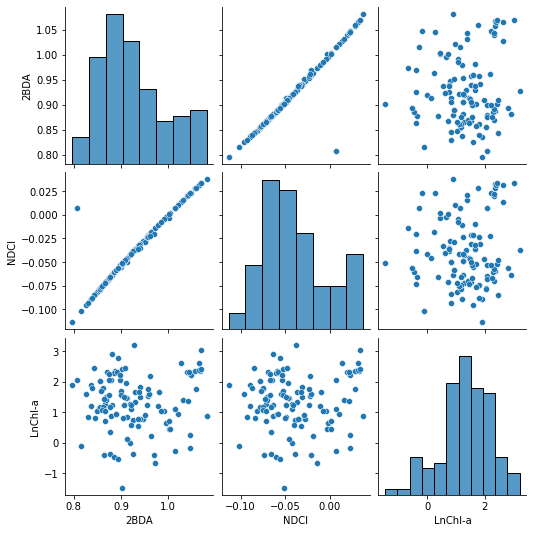

In [8]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(Data[list])

In [9]:
# Getting column names
X_columns = ["2BDA", "NDCI"]
Y = Data["LnChl-a"]

In [10]:
#Calculate VIFs on our dataset
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(Data[X_columns[0:2]].values, i) for i in range(Data[X_columns[0:2]].shape[1])]
vif["features"] = Data[X_columns[0:2]].columns

# display VIF
vif.round()

,VIF Factor,features
0,2.0,2BDA
1,2.0,NDCI


In [11]:
# Extract independent variables (X) & dependent variable (Y)
X = Data[X_columns]
X = add_constant(X)
Y = Data['LnChl-a']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                LnChl-a   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.256
Date:                Wed, 02 Mar 2022   Prob (F-statistic):              0.291
Time:                        18:00:40   Log-Likelihood:                -96.035
No. Observations:                  81   AIC:                             198.1
Df Residuals:                      78   BIC:                             205.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4520      3.908      1.395      0.1

In [12]:
# Get predictions
LnY_predict = result.predict(X_test)
print('Natural logarithm of predicted Y:', LnY_predict)

Natural logarithm of predicted Y: 69     1.399522
46     1.262534
58     1.038306
114    1.420915
73     1.368117
98     1.232852
31     1.473823
53     1.319361
65     1.306032
96     1.367700
95     1.048347
97     1.419955
2      1.413097
62     1.408765
110    1.092876
55     1.360325
103    1.354411
100    1.454479
66     1.155930
44     1.381857
77     1.468493
17     1.253357
81     1.397707
74     1.336107
56     1.373358
94     1.489275
35     1.040050
38     1.114945
93     1.417212
48     1.348259
33     1.125419
59     1.046451
92     1.322313
42     1.326041
10     1.458384
85     1.313457
dtype: float64


In [13]:
import math

Y_predict = np.exp(LnY_predict)

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 7.4
MAE 2.41
RMSE 2.72


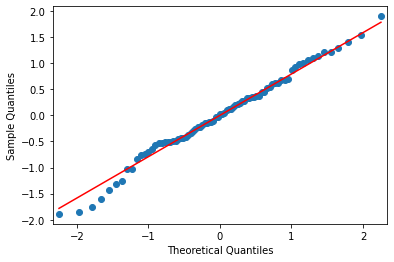

The mean of the residuals is -2.821e-15


In [14]:
import pylab

# check for the normality of the residuals
sm.qqplot(result.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(result.resid)/ len(result.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [15]:
# MergedData: Threshold  Chl-a < 2
Data1 = Data.loc[(Data["LnChl-a"] > 0.6931)]
Data1.shape

(96, 26)

In [16]:
# get the summary
desc_data1 = Data1 [list].describe()

# add the standard deviation metric
desc_data1.loc['+3_std'] = desc_data1.loc['mean'] + (desc_data1.loc['std'] * 3)
desc_data1.loc['-3_std'] = desc_data1.loc['mean'] - (desc_data1.loc['std'] * 3)

# display it
desc_data1

,2BDA,NDCI,LnChl-a
count,96.000000,96.000000,96.000000
mean,0.922930,-0.040637,1.624022
std,0.070653,0.036988,0.604424
min,0.796202,-0.113502,0.704087
25%,0.868419,-0.069905,1.155214
50%,0.905896,-0.049448,1.557091
75%,0.957728,-0.021756,2.067999
max,1.082229,0.037450,3.209229
+3_std,1.134888,0.070326,3.437294
-3_std,0.710971,-0.151601,-0.189250


In [17]:
# Pearson Coefficient 
corr1 = Data1[list].corr(method='pearson')

# display the correlation matrix
display(corr1)

,2BDA,NDCI,LnChl-a
2BDA,1.000000,0.953792,0.169320
NDCI,0.953792,1.000000,0.191357
LnChl-a,0.169320,0.191357,1.000000


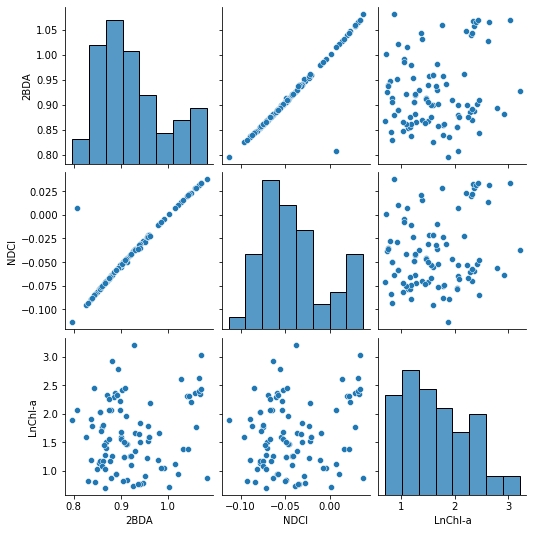

In [18]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(Data1[list])

In [19]:
# Extract independent variables (X) & dependent variable (Y)
X = Data1[X_columns]
X = add_constant(X)
Y = Data1['LnChl-a']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                LnChl-a   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     2.090
Date:                Wed, 02 Mar 2022   Prob (F-statistic):              0.132
Time:                        18:01:11   Log-Likelihood:                -59.838
No. Observations:                  67   AIC:                             125.7
Df Residuals:                      64   BIC:                             132.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5204     26.574      0.283      0.7

In [20]:
# Get predictions
LnY_predict = result.predict(X_test)
print('Natural logarithm of predicted Y:', LnY_predict)

Natural logarithm of predicted Y: 46     1.673123
35     1.864195
52     1.571536
69     1.476818
95     1.867072
89     1.386102
76     1.608484
50     1.557306
98     1.640659
105    1.874261
72     1.437747
30     1.511057
112    1.585737
92     1.594220
36     1.830504
64     1.420126
45     1.463228
12     1.587581
4      2.979111
44     1.507858
62     1.459119
67     1.542857
21     1.510437
110    1.837183
116    1.738838
39     1.800973
37     1.723626
56     1.522953
104    1.859292
dtype: float64


In [21]:
import math

Y_predict = np.exp(LnY_predict)

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 22.7
MAE 3.87
RMSE 4.76


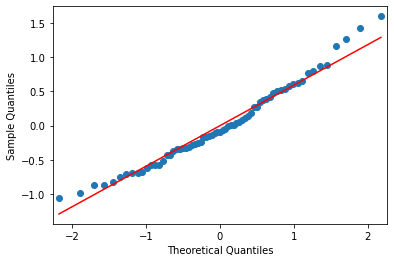

The mean of the residuals is -6.615e-15


In [22]:
import pylab

# check for the normality of the residuals
sm.qqplot(result.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(result.resid)/ len(result.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [23]:
# MergedData: Threshold  Chl-a > 8
Data2 = Data.loc[(Data["LnChl-a"] > 2.0794)]
Data2.shape

(23, 26)

In [24]:
# Descriptive statistics of all variables
list = ['2BDA', 'NDCI', 'LnChl-a']

# get the summary
desc_data2 = Data2 [list].describe()

# add the standard deviation metric
desc_data2.loc['+3_std'] = desc_data2.loc['mean'] + (desc_data2.loc['std'] * 3)
desc_data2.loc['-3_std'] = desc_data2.loc['mean'] - (desc_data2.loc['std'] * 3)

# display it
desc_data2

,2BDA,NDCI,LnChl-a
count,23.000000,23.000000,23.000000
mean,0.964529,-0.020131,2.471272
std,0.084977,0.043871,0.273217
min,0.843901,-0.084683,2.181998
25%,0.889503,-0.058632,2.311643
50%,0.927337,-0.037805,2.357831
75%,1.053191,0.025676,2.535809
max,1.070283,0.033933,3.209229
+3_std,1.219460,0.111481,3.290924
-3_std,0.709598,-0.151743,1.651620


In [25]:
# Pearson Coefficient 
corr2 = Data2[list].corr(method='pearson')

# display the correlation matrix
display(corr2)

,2BDA,NDCI,LnChl-a
2BDA,1.000000,0.999805,0.008813
NDCI,0.999805,1.000000,0.013647
LnChl-a,0.008813,0.013647,1.000000


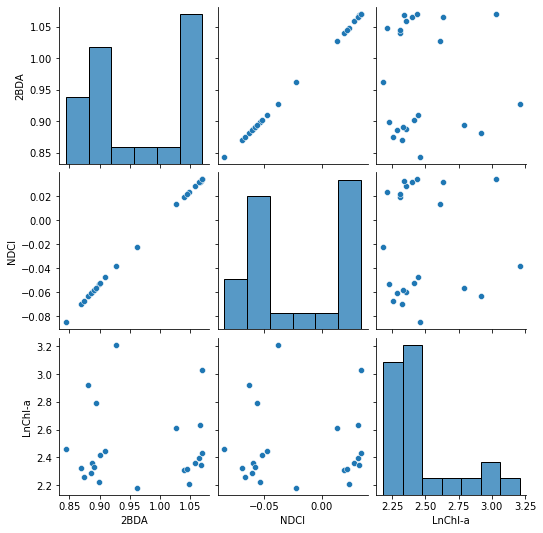

In [26]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(Data2[list])

In [27]:
# Extract independent variables (X) & dependent variable (Y)
X = Data2[X_columns]
X = add_constant(X)
Y = Data2['LnChl-a']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                LnChl-a   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.9345
Date:                Wed, 02 Mar 2022   Prob (F-statistic):              0.418
Time:                        18:01:38   Log-Likelihood:               -0.29998
No. Observations:                  16   AIC:                             6.600
Df Residuals:                      13   BIC:                             8.918
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.6391     60.298      1.221      0.2

C:\Users\SarShel\anaconda3\envs\geostats_env\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [28]:
# Get predictions
LnY_predict = result.predict(X_test)
print('Natural logarithm of predicted Y:', LnY_predict)

Natural logarithm of predicted Y: 101    2.597397
89     2.169660
33     2.594622
69     2.418335
98     2.262022
87     2.450959
58     2.358828
dtype: float64


In [29]:
import math

Y_predict = np.exp(LnY_predict)

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 79.6
MAE 8.77
RMSE 8.92


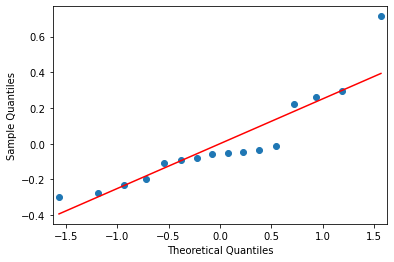

The mean of the residuals is -9.603e-15


In [31]:
import pylab

# check for the normality of the residuals
sm.qqplot(result.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(result.resid)/ len(result.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))